In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv(r"C:\Users\igbopa\Desktop\Kaggle\Flood Prediction\train.csv")
test=pd.read_csv(r"C:\Users\igbopa\Desktop\Kaggle\Flood Prediction\test.csv")
sample=pd.read_csv(r"C:\Users\igbopa\Desktop\Kaggle\Flood Prediction\sample_submission.csv")

In [3]:
train.shape

(1117957, 22)

In [4]:
test.shape

(745305, 21)

In [5]:
sample.shape

(745305, 2)

In [6]:
train.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [7]:
train.columns

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

In [8]:
train.drop('id',axis=1,inplace=True)
test.drop('id',axis=1,inplace=True)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 21 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   MonsoonIntensity                 1117957 non-null  int64  
 1   TopographyDrainage               1117957 non-null  int64  
 2   RiverManagement                  1117957 non-null  int64  
 3   Deforestation                    1117957 non-null  int64  
 4   Urbanization                     1117957 non-null  int64  
 5   ClimateChange                    1117957 non-null  int64  
 6   DamsQuality                      1117957 non-null  int64  
 7   Siltation                        1117957 non-null  int64  
 8   AgriculturalPractices            1117957 non-null  int64  
 9   Encroachments                    1117957 non-null  int64  
 10  IneffectiveDisasterPreparedness  1117957 non-null  int64  
 11  DrainageSystems                  1117957 non-null 

In [10]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
MonsoonIntensity,1117957.0,4.921450,2.056387,0.000,3.00,5.000,6.00,16.000
TopographyDrainage,1117957.0,4.926671,2.093879,0.000,3.00,5.000,6.00,18.000
RiverManagement,1117957.0,4.955322,2.072186,0.000,4.00,5.000,6.00,16.000
Deforestation,1117957.0,4.942240,2.051689,0.000,4.00,5.000,6.00,17.000
Urbanization,1117957.0,4.942517,2.083391,0.000,3.00,5.000,6.00,17.000
ClimateChange,1117957.0,4.934093,2.057742,0.000,3.00,5.000,6.00,17.000
DamsQuality,1117957.0,4.955878,2.083063,0.000,4.00,5.000,6.00,16.000
Siltation,1117957.0,4.927791,2.065992,0.000,3.00,5.000,6.00,16.000
AgriculturalPractices,1117957.0,4.942619,2.068545,0.000,3.00,5.000,6.00,16.000
Encroachments,1117957.0,4.949230,2.083324,0.000,4.00,5.000,6.00,18.000


Feature Engineering

In [11]:
features=train.drop(['FloodProbability'],axis=1).columns.to_list()
target=['FloodProbability']

<Axes: >

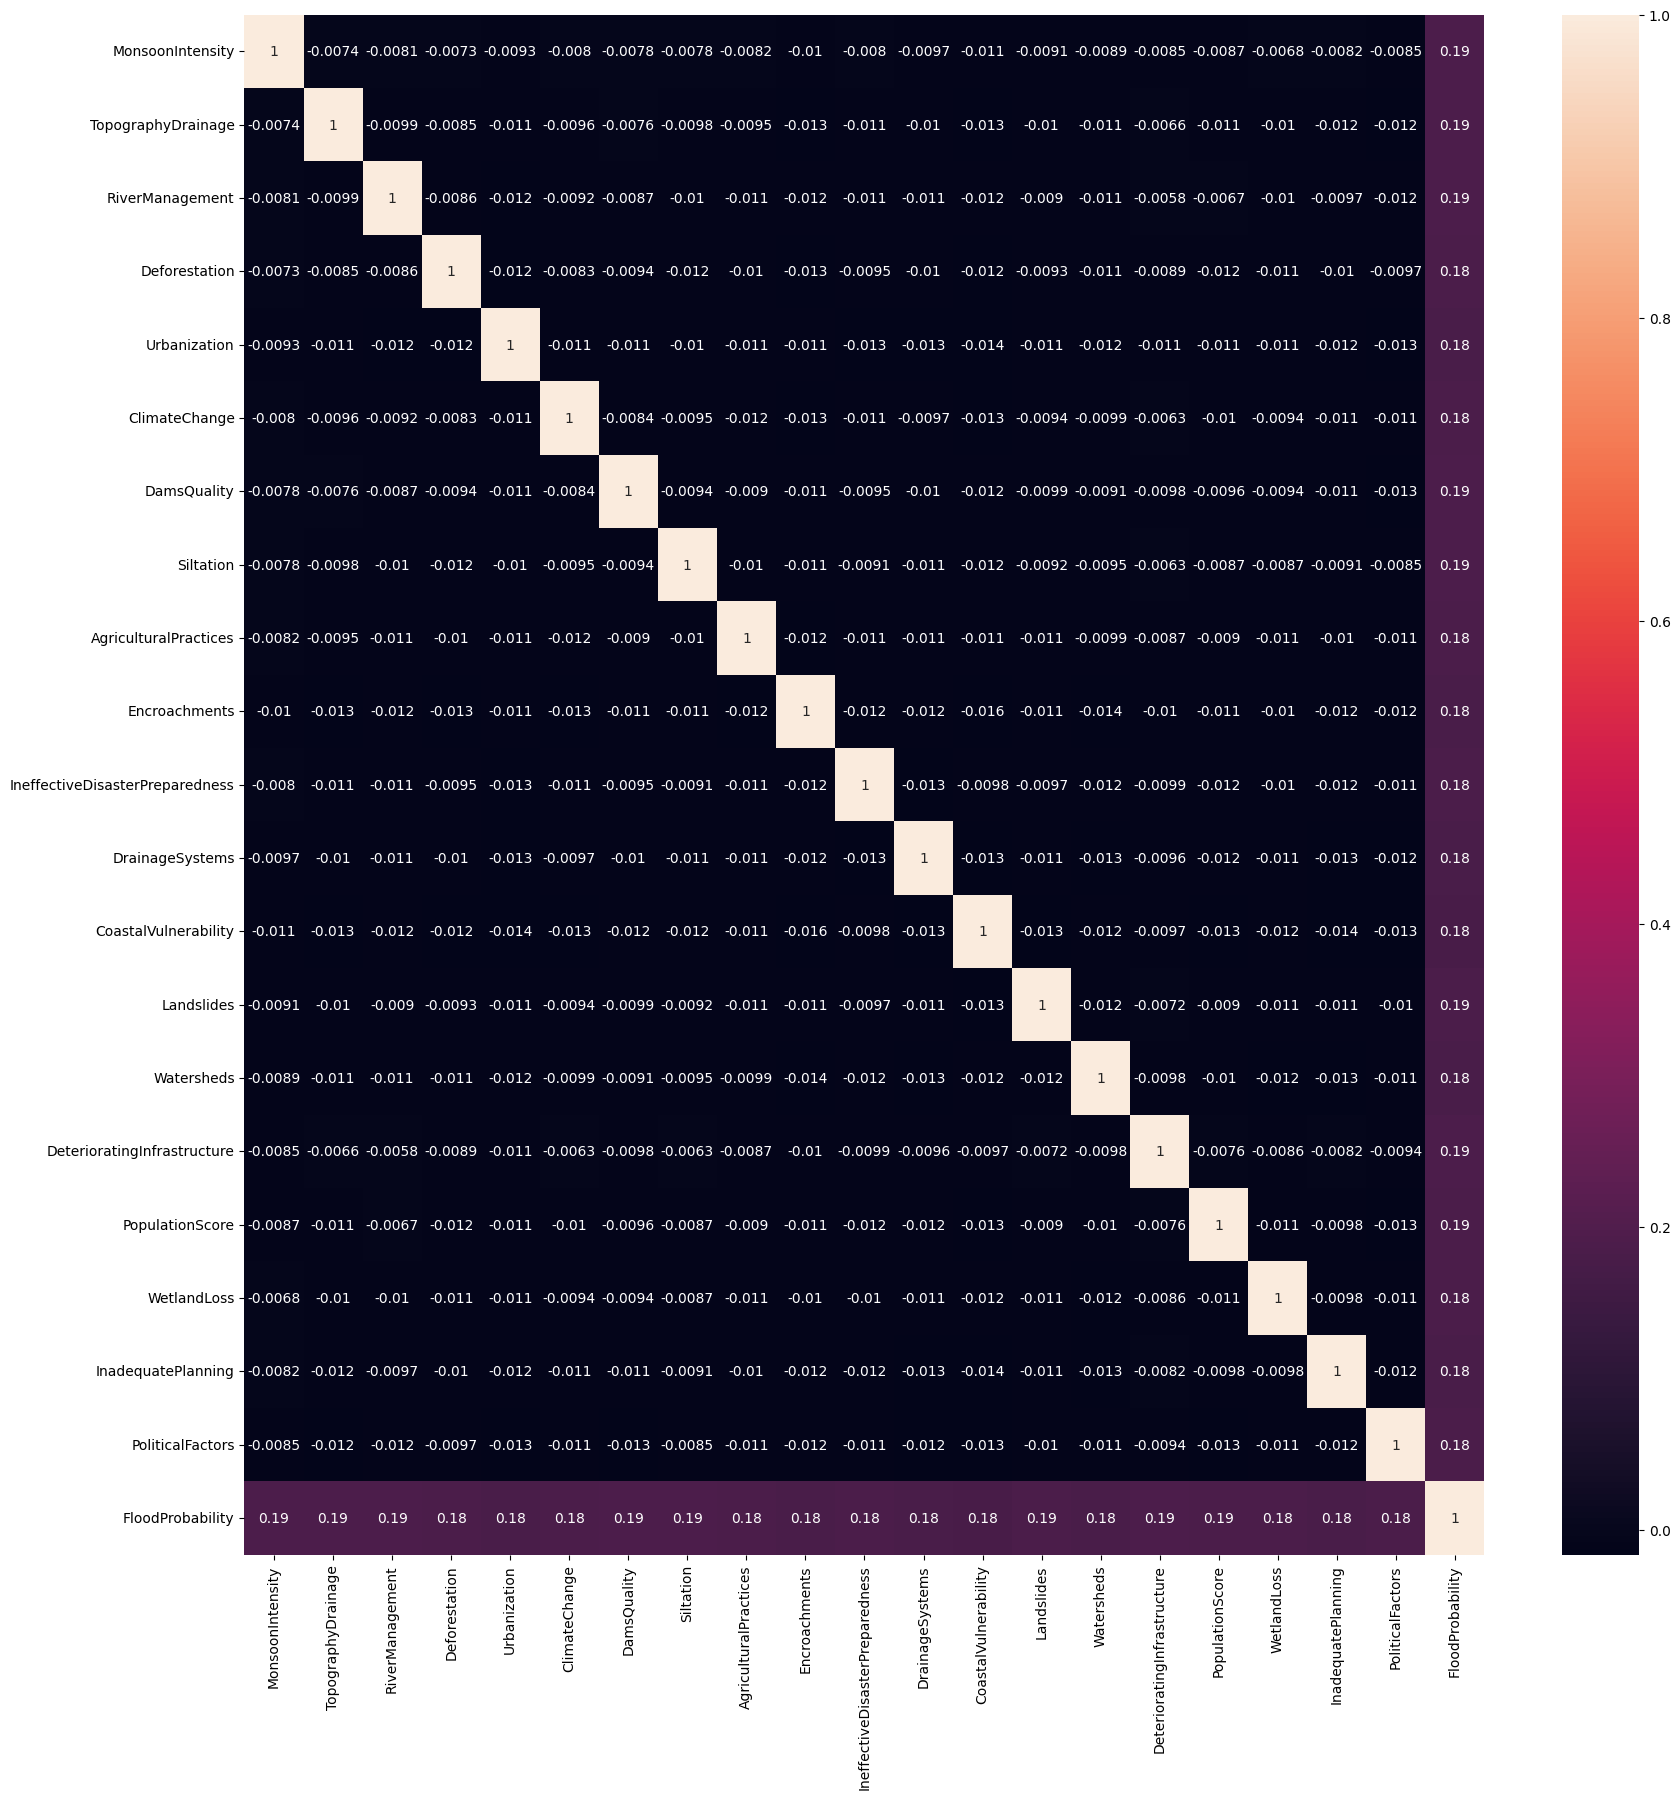

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(),annot=True)

In [13]:
train_2=train.copy()
train_2['all']=train_2['MonsoonIntensity']
for i in features:
    if i=='MonsoonIntensity':
        continue
    train_2['all']=train_2['all']+train_2[i]
train_2['all']=train_2['all']/25
features.append('all')

<Axes: >

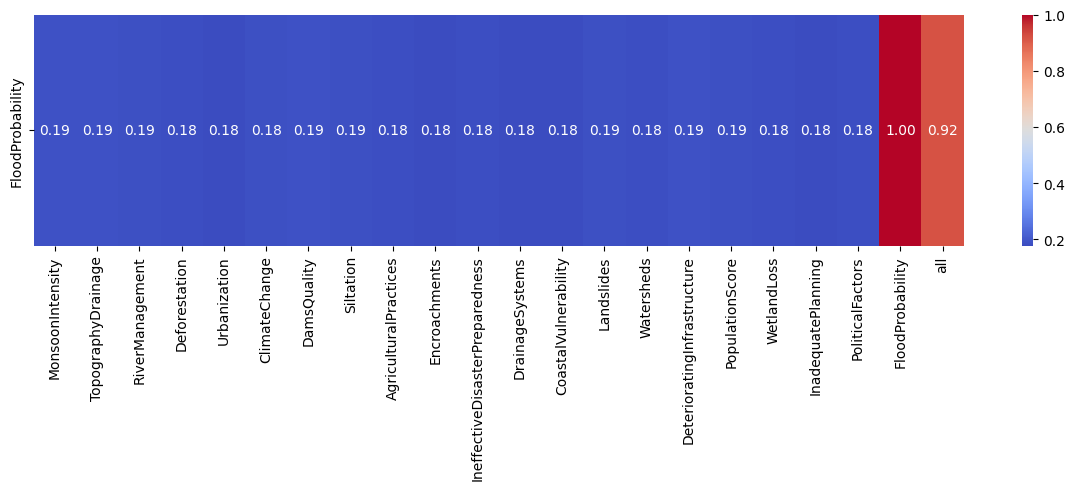

In [14]:
plt.figure(figsize=(15,3))
sns.heatmap(train_2.corr()['FloodProbability'].to_frame().T, annot=True, cmap='coolwarm', fmt=".2f")

In [15]:
train_test=pd.concat([train,test],axis=0)

In [16]:
train_test['all']=train_test['MonsoonIntensity']#adding the 'all' feature to the original dataset
for i in features:
    if i=='MonsoonIntensity':
        continue
    train_test['all']=train_test['all']+train_test[i]
train_test['all']=train_test['all']/25
features.append('all')

In [17]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

train_test_mms = train_test.copy()  # Copy original DataFrame

# MinMaxScaler
mms = MinMaxScaler()
train_test_mms[features] = mms.fit_transform(train_test_mms[features])

# StandardScaler
ss = StandardScaler()
train_test_ss = train_test.copy()  # Copy original DataFrame
train_test_ss[features] = ss.fit_transform(train_test_ss[features])

# RobustScaler
rs = RobustScaler()
train_test_rs = train_test.copy()  # Copy original DataFrame
train_test_rs[features] = rs.fit_transform(train_test_rs[features])

# RobustScaler on top of MinMaxScaler
train_test_mms_rs = train_test_mms.copy()  # Copy DataFrame with MinMaxScaler applied
train_test_mms_rs[features] = rs.fit_transform(train_test_mms_rs[features])

In [18]:
train_ss=train_test_ss[train_test_ss['FloodProbability'].notna()].copy()
test_ss=train_test_ss[train_test_ss['FloodProbability'].isna()].drop('FloodProbability',axis=1).copy()

In [19]:
ss = StandardScaler()
train_scaled = train_2.copy()  # Copy original DataFrame
train_scaled[features] = ss.fit_transform(train_scaled[features])

In [20]:
X=train_2.drop('FloodProbability',axis=1)
X.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,all
0,5,8,5,8,6,4,4,3,3,4,...,5,3,3,5,4,7,5,7,3,3.76
1,6,7,4,4,8,8,3,5,4,6,...,7,2,0,3,5,3,3,4,3,3.76
2,6,5,6,7,3,7,1,5,4,5,...,7,3,7,5,6,8,2,3,3,3.96
3,3,4,6,5,4,8,4,7,6,8,...,2,4,7,4,4,6,5,7,5,4.16
4,5,3,2,6,4,4,3,3,3,3,...,2,2,6,6,4,1,2,3,5,2.88


In [21]:
Y=train_2.FloodProbability
Y

0          0.445
1          0.450
2          0.530
3          0.535
4          0.415
           ...  
1117952    0.495
1117953    0.480
1117954    0.485
1117955    0.495
1117956    0.560
Name: FloodProbability, Length: 1117957, dtype: float64

In [22]:
train_sample = train.head(40000)
X_sample = train_sample.drop('FloodProbability', axis=1)
Y_sample = train_sample['FloodProbability']

train_sample_ss = train_scaled.head(40000)
X_sample_ss = train_sample_ss.drop('FloodProbability', axis=1)
Y_sample_ss = train_sample_ss['FloodProbability']

In [23]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge,ElasticNet, Lasso,LinearRegression
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score

In [24]:
from sklearn.metrics import r2_score ,make_scorer
def r2(y_true,y_pred):
        return r2_score(y_true,y_pred)
r2_scorer=make_scorer(r2,greater_is_better=True)
def eval_models(models,X,Y):
    scores={"Model":[],"Score":[]}
    for model in models:
        cv=KFold(n_splits=5,shuffle=True,random_state=42)
        cv_score=cross_val_score(model,X,Y,cv=5,scoring=r2_scorer,n_jobs=-1).mean() 
        scores["Model"].append(model)
        scores["Score"].append(cv_score)
    scores=pd.DataFrame(scores)
    return scores
def eval_model(model,X,Y):
    scores={"Model":[],"Score":[]}
    cv=KFold(n_splits=5,shuffle=True,random_state=42)
    cv_score=cross_val_score(model,X,Y,cv=5,scoring=r2_scorer,n_jobs=-1).mean()
    scores["Model"].append(model)
    scores["Score"].append(cv_score)
    scores=pd.DataFrame(scores)
    return scores

In [25]:
mlp_regressor = MLPRegressor()
enet_regressor =ElasticNet()
ridge_regressor =Ridge()
lasso_regressor =Lasso()
rf_regressor = RandomForestRegressor(n_jobs=-1)
svr_regressor = SVR()
knn_regressor = KNeighborsRegressor()
xgb_regressor = XGBRegressor(nthread=-1)
catboost_regressor = CatBoostRegressor(verbose=False,thread_count=-1)
lgbm_regressor = LGBMRegressor(verbose=-1)

from sklearn.preprocessing import PolynomialFeatures

poly_features2= PolynomialFeatures(degree=2)
poly_features3= PolynomialFeatures(degree=3)
poly_features4= PolynomialFeatures(degree=4)

ridge_2 = make_pipeline(poly_features2,Ridge())
mlp_rs_ss = make_pipeline(ss,MLPRegressor())


models=[enet_regressor,ridge_regressor,ridge_2,lasso_regressor,rf_regressor,svr_regressor,knn_regressor,xgb_regressor,catboost_regressor,
mlp_regressor,lgbm_regressor]

In [26]:
scores=eval_models(models,X_sample,Y_sample)
scores

,Model,Score
0,ElasticNet(),-0.000074
1,Ridge(),0.846358
2,"(PolynomialFeatures(), Ridge())",0.845846
3,Lasso(),-0.000074
4,RandomForestRegressor(n_jobs=-1),0.583800
5,SVR(),0.594015
6,KNeighborsRegressor(),0.588535
7,"XGBRegressor(base_score=None, booster=None, ca...",0.763570
8,<catboost.core.CatBoostRegressor object at 0x0...,0.843679
9,MLPRegressor(),0.572036


In [27]:
scores=eval_models(models,X_sample_ss,Y_sample_ss)
scores

,Model,Score
0,ElasticNet(),-0.000074
1,Ridge(),0.846358
2,"(PolynomialFeatures(), Ridge())",0.845846
3,Lasso(),-0.000074
4,RandomForestRegressor(n_jobs=-1),0.861394
5,SVR(),0.616312
6,KNeighborsRegressor(),0.720222
7,"XGBRegressor(base_score=None, booster=None, ca...",0.860280
8,<catboost.core.CatBoostRegressor object at 0x0...,0.865090
9,MLPRegressor(),0.784811


In [28]:
from sklearn.ensemble import VotingRegressor,StackingRegressor


base_models1=[
    ('catboost',catboost_regressor),
    ("xgb",xgb_regressor),
    ("lgbm",lgbm_regressor)
]


stacked_regressor=StackingRegressor(estimators=base_models1,final_estimator=Ridge(alpha= 1.6166396573920392))

In [29]:
X=train_scaled.drop('FloodProbability',axis=1)
Y=train_scaled.FloodProbability

In [30]:
stacked_regressor.fit(X,Y)

StackingRegressor(estimators=[('catboost',
                               <catboost.core.CatBoostRegressor object at 0x000001FF44D0F460>),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_...
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            nthread=-1, num_parallel_tree=None, ...)),
                              ('lgbm', LGBMRegressor(verbose=-1))],
                  final_estimator=Ridge(alpha=1.6166396573920392))

In [31]:
final_predictions=stacked_regressor.predict(test_ss)

In [32]:
sample.FloodProbability=final_predictions

In [33]:
sample.to_csv("submission.csv",index=False)

In [34]:
sample.head()

,id,FloodProbability
0,1117957,0.575908
1,1117958,0.448081
2,1117959,0.447173
3,1117960,0.469383
4,1117961,0.469843
